In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [2]:
def pay(r, n, pv):
    m = pv*r / (1-(1+r)**(-n))
    
    return int(np.round(m,0))

## P1

In [44]:
r_base = 0.11
f_base = 5000
c = 14000 

In [45]:
v1 = []
for f in [2500, 5000, 7000]:
    flow = 0
    for t in np.arange(1, 7):
        v = f*(1/((1+r_base)**t))
        print(t, v)
        flow += v
    print(flow)
    v1.append(flow-c)
    print(f'Net: {flow-c}\n')

1 2252.252252252252
2 2029.0560831101368
3 1827.9784532523754
4 1646.8274353625004
5 1483.6283201463966
6 1336.6020902219786
10576.34463434564
Net: -3423.65536565436

1 4504.504504504504
2 4058.1121662202736
3 3655.956906504751
4 3293.654870725001
5 2967.2566402927932
6 2673.2041804439573
21152.68926869128
Net: 7152.68926869128

1 6306.3063063063055
2 5681.357032708383
3 5118.339669106651
4 4611.116819015001
5 4154.15929640991
6 3742.48585262154
29613.764976167793
Net: 15613.764976167793



In [46]:
v2 = []
for r in [0.095, 0.11, 0.12]:
    flow = 0
    for t in np.arange(1, 7):
        v = f_base*(1/((1+r)**t))
        print(t, v)
        flow += v
    print(flow)
    v2.append(flow-c)
    print(f'Net: {flow-c}\n')

1 4566.210045662101
2 4170.054836221097
3 3808.2692568229195
4 3477.8714674181915
5 3176.1383264093074
6 2900.582946492518
22099.12687902614
Net: 8099.126879026138

1 4504.504504504504
2 4058.1121662202736
3 3655.956906504751
4 3293.654870725001
5 2967.2566402927932
6 2673.2041804439573
21152.68926869128
Net: 7152.68926869128

1 4464.285714285714
2 3985.9693877551017
3 3558.9012390670546
4 3177.5903920241553
5 2837.134278592996
6 2533.1556058866026
20557.036617611622
Net: 6557.036617611622



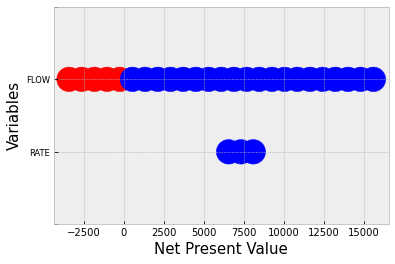

In [47]:
plt.title('',fontsize=20)

s = ['','RATE','FLOW','']
x = np.linspace(np.min(v1),np.max(v1), 25)
y = [2]* len(x)
c = ['red' if s<=0 else 'blue' for s in x]
plt.scatter(x,y, color=c, s=600)

x = np.linspace(np.min(v2),np.max(v2), 3)
y = [1]* len(x)
c = ['red' if s<=0 else 'blue' for s in x]
plt.scatter(x,y, color=c, s=600)
plt.yticks(range(len(s)), s, size='small')

plt.ylabel('Variables', fontsize=15)
plt.xlabel('Net Present Value', fontsize=15)
plt.show()

## P2

In [48]:
def calculate(house, verbose=0):
    
    tax_rate = 0.33
    property_tax_rate = 0.01
    
    if house == 'astoria':
        price = 450000
        insurance = 1080
        mortage = 27866
        repair = 2400
        p_rented = 0
        monthly_rent = 0
        months_occupied = 0
        
        P = 0.78
        
    elif house == 'charlotte':
        price = 600000
        insurance = 1440
        mortage = 47143
        repair = 4000
        p_rented = 0.35
        monthly_rent = 1500
        months_occupied = 10
        
        P = 0.85
        
    elif house == 'barnard':
        price = 750000
        insurance = 1800
        mortage = 56813
        repair = 3200
        p_rented = 0.40
        monthly_rent = 2000
        months_occupied = 10
        
        P = 0.85
        
    tax_ded = tax_rate*(1-p_rented)*(P*mortage)
    
    rental_income = monthly_rent*months_occupied
    
    cost = mortage + insurance + repair + price*property_tax_rate
    
    net_anual_cost = cost - (rental_income + tax_ded)
 
    
    if verbose:
        print(f'Tax Ded.: {tax_ded}')
        print(f'Rental Income: {rental_income}')
        print(f'Cost: {cost}')
        print(f'Net: {np.round(net_anual_cost,1)}\n')
        
    
    return np.round(net_anual_cost,0)
    

In [49]:
calculate('astoria')

28673.0

In [50]:
calculate('barnard')

39751.0

In [51]:
calculate('charlotte')

34988.0

In [95]:
def calculate_v2(house, tax=0.33, verbose=0):
    
    tax_rate = tax
    
    property_tax_rate = 0.01
    appreciation_percent = 0.0625
    
    if house == 'astoria':
        price = 450000
        insurance = 1080
        mortage = 27866
        repair = 2400
        p_rented = 0
        monthly_rent = 0
        months_occupied = 0
        
        equity = 6131
        
        P = 0.78
        
    elif house == 'barnard':
        price = 750000
        insurance = 1800
        mortage = 56813
        repair = 3200
        p_rented = 0.40
        monthly_rent = 2000
        months_occupied = 10
        
        equity = 8522
        
        P = 0.85
        
    elif house == 'charlotte':
        price = 600000
        insurance = 1440
        mortage = 47143
        repair = 4000
        p_rented = 0.35
        monthly_rent = 1500
        months_occupied = 10
        
        equity = 7071
        
        P = 0.85
        
        
    interest_paid = (P*mortage)
    depreciation = (p_rented*price)/27
    deductible_mortage_interest = (1-p_rented)*interest_paid
        
    tax_deduction = deductible_mortage_interest + depreciation + p_rented*repair
    
    tax_savings = tax_deduction*tax_rate
    
    rental_income = monthly_rent*months_occupied
    
    tax_on_rental_income = (tax_rate*rental_income) #- (p_rented*repair)

    total_cost = mortage + insurance + repair + (price*property_tax_rate) + tax_on_rental_income
    
    net_anual_cost = total_cost - (rental_income + tax_savings)
    
    appreciation = price * appreciation_percent
    
    value = appreciation + equity - net_anual_cost
    
    if verbose:
        print(f'Tax Deduction.: {tax_deduction:.1f}')
        print(f'    {deductible_mortage_interest:.1f} + {depreciation:.1f} + {p_rented*repair:.1f}\n')
        print(f'Tax Savings: {tax_savings:.1f}')
        print(f'    {tax_deduction:.1f} * {tax_rate:.1f}\n')
        print(f'Rental Income: {rental_income:.1f}')
        print(f'    {monthly_rent:.1f} * {months_occupied:.1f}\n')
        print(f'Tax on Rental Income: {tax_on_rental_income}')
        print(f'    {(tax_rate*rental_income)} + {(p_rented*repair)}\n')
        print(f'Cost: {total_cost}')
        print(f'    {mortage} + {insurance} + {repair} + {(price*p_tax_rate)} + {tax_on_rental_income}\n')
        print(f'Net Cost: {np.round(net_anual_cost,0)}\n')
        
    print(f'Value: {value:.0f}')
    
    return np.round(net_anual_cost,0)

In [96]:
print(calculate('astoria',verbose=0))
calculate_v2('astoria',verbose=0)

28673.0
Value: 5583


28673.0

In [97]:
print(calculate('barnard',verbose=0))
calculate_v2('barnard',verbose=0)

39751.0
Value: 13135


42262.0

In [98]:
print(calculate('charlotte',verbose=0))
calculate_v2('charlotte',verbose=0)

34988.0
Value: 7662


36909.0

In [59]:
print('Astoria')
print(calculate('astoria'), calculate_v2('astoria'),'---->', calculate('astoria') - calculate_v2('astoria'))
print('Barnard')
print(calculate('barnard'), calculate_v2('barnard'),'---->', calculate('barnard') - calculate_v2('barnard'))
print('Carlotte')
print(calculate('charlotte'), calculate_v2('charlotte'),'---->', calculate('charlotte') - calculate_v2('charlotte'))

Astoria
28673.0 28673.0 ----> 0.0
Barnard
39751.0 42262.0 ----> -2511.0
Carlotte
34988.0 36909.0 ----> -1921.0


In [60]:
taxes = np.linspace(0.15, 0.45, 10)
taxes

array([0.15      , 0.18333333, 0.21666667, 0.25      , 0.28333333,
       0.31666667, 0.35      , 0.38333333, 0.41666667, 0.45      ])

In [61]:
a = []
b = []
c = []
for t in taxes:
    a.append(calculate_v2('astoria',t)450000)
    b.append(calculate_v2('barnard',t))
    c.append(calculate_v2('charlotte',t))

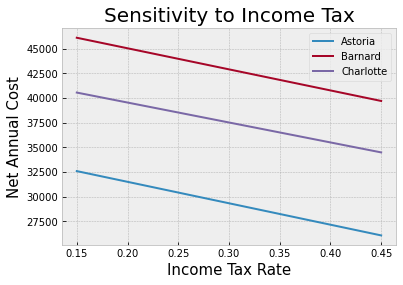

In [62]:
plt.title('Sensitivity to Income Tax', fontsize=20)
plt.plot(taxes, a, label='Astoria')
plt.plot(taxes, b, label='Barnard')
plt.plot(taxes, c, label='Charlotte')
plt.xlabel('Income Tax Rate', fontsize=15)
plt.ylabel('Net Annual Cost', fontsize=15)
plt.legend()
plt.show()

In [71]:
for i,j in zip(taxes,a):
    print(f'{i:.4f} --- {j:.2f}')

0.1500 --- 32586.00
0.1833 --- 31861.00
0.2167 --- 31137.00
0.2500 --- 30412.00
0.2833 --- 29688.00
0.3167 --- 28963.00
0.3500 --- 28239.00
0.3833 --- 27514.00
0.4167 --- 26790.00
0.4500 --- 26065.00


In [24]:
def pay(r, n, pv):
    m = pv*r / (1-(1+r)**(-n))
    
    return int(np.round(m,0))

In [25]:
pay(0.055, 30, 450000-45000)

27866

In [29]:
def calculate_astoria(down=45000, 
                      interest=0.055, 
                      tax_rate=0.33, 
                      property_tax_rate=0.01,
                      monthly_rent=1500,
                      months_occupied=10, 
                      insurance=1080,
                      repair=2400,
                      verbose=0):
    
    price = 450000
    p_rented = 0
    P = 0.78
    

    pv = price - down
    mortage = pay(interest,30,pv)
    #print('Mortage: ', mortage)

        
    interest_paid = (P*mortage)
    depreciation = (p_rented*price)/27
    deductible_mortage_interest = (1-p_rented)*interest_paid
        
    tax_deduction = deductible_mortage_interest + depreciation + p_rented*repair
    
    tax_savings = tax_deduction*tax_rate
    
    rental_income = monthly_rent*months_occupied
    
    tax_on_rental_income = (tax_rate*rental_income) #- (p_rented*repair)

    total_cost = mortage + insurance + repair + (price*property_tax_rate) + tax_on_rental_income
    
    net_anual_cost = total_cost - (rental_income + tax_savings)
    
    if verbose:450000
        print(f'Tax Deduction.: astoria{tax_deduction:.1f}')
        print(f'    {deductible_mortage_interest:.1f} + {depreciation:.1f} + {p_rented*repair:.1f}\n')
        print(f'Tax Savings: {tax_savings:.1f}')
        print(f'    {tax_deduction:.1f} * {tax_rate:.1f}\n')
        print(f'Rental Income: {rental_income:.1f}')
        print(f'    {monthly_rent:.1f} * {months_occupied:.1f}\n')
        print(f'Tax on Rental Income: {tax_on_rental_income}')
        print(f'    {(tax_rate*rental_income)} + {(p_rented*repair)}\n')
        print(f'Cost: {total_cost}')
        print(f'    {mortage} + {insurance} + {repair} + {(price*p_tax_rate)} + {tax_on_rental_income}\n')
        print(f'Net Cost: {np.round(net_anual_cost,0)}\n')
    
    return np.round(net_anual_cost,0)

In [30]:
calculate_astoria(monthly_rent=0, verbose=0) # BASE SCENARIOpv

28673.0

In [31]:
calculate_astoria(verbose=0) # BASE SCENARIO

18623.0

In [32]:
p1 = [30000, 45000, 70000]
p2 = [0.04, 0.055, 0.08]
p3 = [0.25, 0.55, 0.44]
p4 = [0.01, 0.01, 0.02]
p5 = [1000, 1500, 2400]
p6 = [0, 10, 12]
p7 = [800, 1080, 1600]
p8 = [1000, 2400, 10000]

In [33]:
p1v = []
p2v = []
p3v = []
p4v = []
p5v = []
p6v = []
p7v = []
p8v = []
for i in p1:
    p1v.append(calculate_astoria(down=i))
for i in p2:
    p2v.append(calculate_astoria(interest=i))
for i in p3:
    p3v.append(calculate_astoria(tax_rate=i))
for i in p4:
    p4v.append(calculate_astoria(property_tax_rate=i))
for i in p5:
    p5v.append(calculate_astoria(monthly_rent=i))
for i in p6:
    p6v.append(calculate_astoria(months_occupied=i))
for i in p7:
    p7v.append(calculate_astoria(insurance=i))
for i in p8:
    p8v.append(calculate_astoria(repair=i))

In [74]:
parameters = [p1v,p2v,p3v,p4v,p5v,p6v,p7v,p8v]

In [76]:
rank = []
for i, v in enumerate(parameters):
    #print(i, np.ptp(v))
    rank.append(np.ptp(v))
sorted_rank = []
while np.sum(rank) >0:    
    idx = np.argmax(rank)
    print(idx)
    rank[idx] = -1
    print(rank)
    sorted_rank.append(parameters[idx])

5
[2044.0, 9323.0, 2021.0, 4500.0, 9380.0, -1, 800.0, 9000.0]
4
[2044.0, 9323.0, 2021.0, 4500.0, -1, -1, 800.0, 9000.0]
1
[2044.0, -1, 2021.0, 4500.0, -1, -1, 800.0, 9000.0]
7
[2044.0, -1, 2021.0, 4500.0, -1, -1, 800.0, -1]
3
[2044.0, -1, 2021.0, -1, -1, -1, 800.0, -1]
0
[-1, -1, 2021.0, -1, -1, -1, 800.0, -1]
2
[-1, -1, -1, -1, -1, -1, 800.0, -1]
6
[-1, -1, -1, -1, -1, -1, -1, -1]


In [35]:
news = [p7v,p3v,p1v,p4v,p8v,p2v,p5v,p6v]

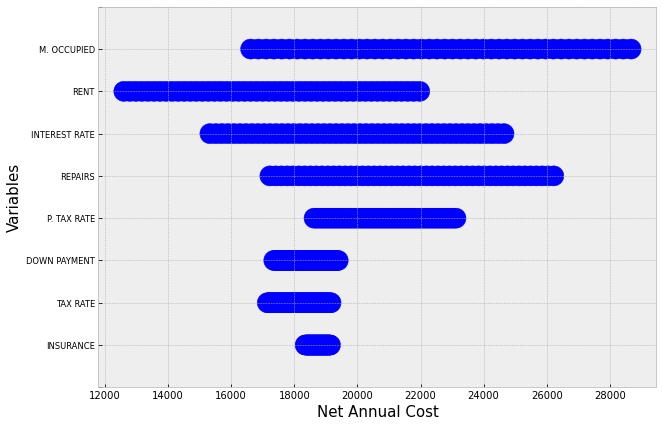

In [42]:
plt.figure(figsize=(10,7))
plt.title('',fontsize=20)

s = ['','INSURANCE','TAX RATE','DOWN PAYMENT','P. TAX RATE','REPAIRS','INTEREST RATE','RENT','M. OCCUPIED','']

for i, v in enumerate(news):
    x = np.linspace(np.min(v),np.max(v), 50)
    y = [i+1]* len(x)
    c = ['red' if s<=0 else 'blue' for s in x]
    plt.scatter(x,y, color=c, s=400)

plt.yticks(range(len(s)), s, size='small')

plt.ylabel('Variables', fontsize=15)
plt.xlabel('Net Annual Cost', fontsize=15)
plt.show()

## P4

In [3]:
def calculate_house(house='astoria',
                      #down=45000, 
                      interest=0.055, 
                      tax_rate=0.33, 
                      property_tax_rate=0.01,
                      #monthly_rent=1500,
                      #months_occupied=10, 
                      #insurance=1080,
                      #repair=2400,
                    
                      appreciation_percent = 0.0625,
                    
                      value=0):
    
    if house == 'astoria':
        price = 450000
        p_rented = 0
        P = 0.78
        down=45000
        monthly_rent=0
        months_occupied=0
        insurance=1080
        repair=2400
        equity = 6131
        
    if house == 'barnard':
        price = 750000
        p_rented = 0.40
        P = 0.85
        down=45000
        monthly_rent=2000
        months_occupied=10 
        insurance=1800
        repair=3200
        equity = 8522
        
    if house == 'charlotte':
        price = 600000
        p_rented = 0.35
        P = 0.85
        down=15000
        monthly_rent=1500
        months_occupied=10
        insurance=1440
        repair=4000
        equity = 7071
    

    pv = price - down
    mortage = pay(interest, 30, pv)
    #print('Mortage: ', mortage)

        
    interest_paid = (P*mortage)
    depreciation = (p_rented*price)/27
    deductible_mortage_interest = (1-p_rented)*interest_paid
        
    tax_deduction = deductible_mortage_interest + depreciation + p_rented*repair
    
    tax_savings = tax_deduction*tax_rate
    
    rental_income = monthly_rent*months_occupied
    
    tax_on_rental_income = (tax_rate*rental_income) #- (p_rented*repair)

    total_cost = mortage + insurance + repair + (price*property_tax_rate) + tax_on_rental_income
    
    net_anual_cost = total_cost - (rental_income + tax_savings)
    
    appreciation = price * appreciation_percent
    value = appreciation + equity - net_anual_cost
    

    return np.round(net_anual_cost,0), np.round(value,0)

In [4]:
print(calculate_house('astoria'),'\n')
print(calculate_house('barnard', interest=0.07),'\n')
print(calculate_house('charlotte', interest=0.07))

(28673.0, 5583.0) 

(42262.0, 13135.0) 

(36909.0, 7662.0)


In [5]:
print(calculate_house('charlotte', interest=0.07)[0])
print(calculate_house('charlotte', interest=0.07)[1])

36909.0
7662.0


In [6]:
rates = np.linspace(0.05, 0.08, 10)
rates

array([0.05      , 0.05333333, 0.05666667, 0.06      , 0.06333333,
       0.06666667, 0.07      , 0.07333333, 0.07666667, 0.08      ])

In [7]:
a = []
b = []
c = []
for r in rates:
    a.append(calculate_house('astoria', interest=r)[1])
    b.append(calculate_house('barnard', interest=r)[1])
    c.append(calculate_house('charlotte', interest=r)[1])

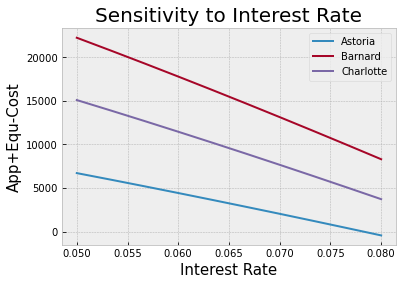

In [8]:
plt.title('Sensitivity to Interest Rate', fontsize=20)
plt.plot(rates, a, label='Astoria')
plt.plot(rates, b, label='Barnard')
plt.plot(rates, c, label='Charlotte')
plt.xlabel('Interest Rate', fontsize=15)
plt.ylabel('App+Equ-Cost', fontsize=15)
plt.legend()
plt.show()

In [9]:
percents = np.linspace(0.02, 0.10, 10)
percents

array([0.02      , 0.02888889, 0.03777778, 0.04666667, 0.05555556,
       0.06444444, 0.07333333, 0.08222222, 0.09111111, 0.1       ])

In [10]:
a = []
b = []
c = []
for p in percents:
    a.append(calculate_house('astoria', appreciation_percent=p)[1])
    b.append(calculate_house('barnard', appreciation_percent=p, interest=0.07)[1])
    c.append(calculate_house('charlotte', appreciation_percent=p, interest=0.07)[1])

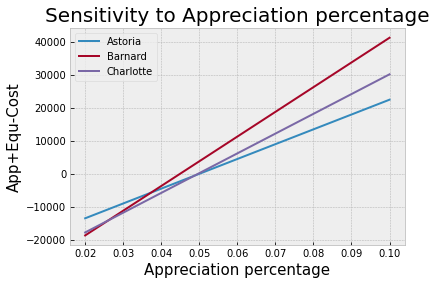

In [11]:
plt.title('Sensitivity to Appreciation percentage', fontsize=20)
plt.plot(percents, a, label='Astoria')
plt.plot(percents, b, label='Barnard')
plt.plot(percents, c, label='Charlotte')
plt.xlabel('Appreciation percentage', fontsize=15)
plt.ylabel('App+Equ-Cost', fontsize=15)
plt.legend()
plt.show()

In [12]:
aps = [0.1, 0.06, 0.02]
probs = [1/6,4/6,1/6]
np.sum(probs)

0.9999999999999999

In [13]:
a = []
b = []
c = []
for p in aps:
    a.append(calculate_house('astoria', appreciation_percent=p)[1])
    b.append(calculate_house('barnard', appreciation_percent=p, interest=0.07)[1])
    c.append(calculate_house('charlotte', appreciation_percent=p, interest=0.07)[1])

In [14]:
print(a)
print(b)
print(c)

[22458.0, 4458.0, -13542.0]
[41260.0, 11260.0, -18740.0]
[30162.0, 6162.0, -17838.0]


In [15]:
print(np.dot(np.array(a),np.array(probs)))
print(np.dot(np.array(b),np.array(probs)))
print(np.dot(np.array(c),np.array(probs)))

4458.0
11260.0
6162.0


In [36]:
x = np.linspace(0,1)
y = -1*x + 1
ax = np.linspace(0,1)
ay = -0.75*ax + 0.217
bx = np.linspace(0,1)
by = -0.75*bx + 0.317
cx = np.linspace(0,1)
cy = -0.75*cx + 0.12

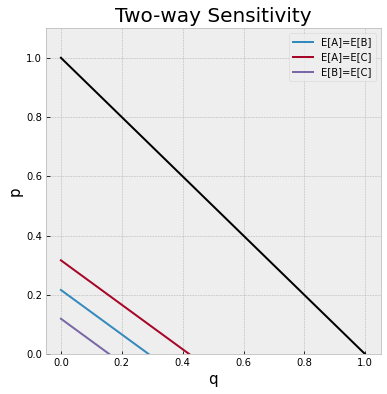

In [52]:
plt.figure(figsize=(6,6))
plt.title('Two-way Sensitivity', fontsize=20)
plt.plot(x, y, c='black')
plt.plot(ax, ay, label='E[A]=E[B]')
plt.plot(bx, by, label='E[A]=E[C]')
plt.plot(cx, cy, label='E[B]=E[C]')
#plt.plot([0,1-(1/6)],[1/6, -1*(1-(1/6)) + 1])
plt.xlabel('q', fontsize=15)
plt.ylabel('p', fontsize=15)
plt.ylim([0,1.1])
plt.legend()
plt.show()